@Data mining

# Data Preparation

In this first task, you will **examine all data attributes and identify issues present in the data**. For each of the issues that you have identified, choose and perform necessary actions to address it. 

Finally, you will need to suitably split the data into two sets: one for training and one for testing, the latter contains 100 samples with missing class labels. Your marks for this task will depend on how well you identify the issues and address them. Below is a list of data preparation issues that you need to address

    • Identify and remove irrelevant attributes.
        - Att09 has a lot of missing values so maybe remove it
    • Detect and handle missing entries
        - Att00 has been replaced by the mean value for now
    • Detect and handle duplicates (both instances and attributes).
    • Select suitable data types for attributes.
    • Perform data transformation (such as scaling/standardization) if needed.
    • Perform other data preparation operations (This is optional, bonus marks will be awarded for novel ideas).

In [1]:
DATA = 'https://github.com/kituyiharry/ClassData/raw/master/Assignment2021.sqlite'
FNAME= 'Assignment2021.sqlite'
import urllib.request


print("================== Fetching data")

urllib.request.urlretrieve(DATA, FNAME)

================== Fetching data


('Assignment2021.sqlite', <http.client.HTTPMessage at 0x7f9350ec4d30>)

#### Data Exploration

In [2]:
import pandas as pd
import sqlite3

Connect to the database via SQLIte and load into pandas dataframe
* There are 1200 entries, the last 200 are missing attributes
* _class_ column is what we are trying to predict
* Some attributes are numeric, some categorical

From Assignment description:
The data is known to contain imperfections:
 * There are missing/corrupted entries in the data set.
 * There are duplicates, both instances and attributes.
 * There are irrelevant attributes that do not contain any useful information useful for the classification task.
 * The labelled data is imbalanced: there is a considerable difference between the number of samples from each class.

In [3]:
con = sqlite3.connect("Assignment2021.sqlite")
df  = pd.read_sql("SELECT * from data;", con)
df.head()

,index,Att00,Att01,Att02,Att03,Att04,Att05,Att06,Att07,Att08,...,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,Att29,class
0,0,5.287197,GHKA,-39922,6.355759,0.322712,-335.710367,-3344,-177.869991,YIFL,...,1,1729,0,0.476141,-2.852193,7.835198,-96.461771,2.571738,YLWZ,2.0
1,1,7.359355,BYUB,-58208,-1.038145,-13.444002,-13.269634,10764,-7.030673,YIFL,...,1,-1375,0,1.489206,7.443108,-1.392234,3.924238,-2.046221,OQDJ,1.0
2,2,0.180267,UKEV,-54723,-0.472630,0.430519,209.756774,8751,111.135786,YIFL,...,1,-237,0,1.387899,-8.128869,1.894883,42.619242,-0.353631,YLWZ,2.0
3,3,5.057138,LLTF,37087,-1.922072,4.437176,-73.948010,9395,-39.179999,HFTX,...,0,4169,1,2.522532,-11.944330,0.398884,80.423726,6.202030,YLWZ,1.0
4,4,2.177483,LWYW,-68418,2.853903,-6.030091,92.902052,-9034,49.222451,YIFL,...,0,2731,0,0.934553,3.970141,-2.798476,155.302128,4.062378,OELG,2.0


In [4]:
%matplotlib inline

In [5]:
df[:1000].describe()

,index,Att00,Att02,Att03,Att04,Att05,Att06,Att07,Att09,Att10,...,Att20,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,class
count,1000.000000,991.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,419.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,1.608784,-11997.292000,0.716286,1.879454,-80.675601,-112.095000,-42.744490,0.058428,62.168523,...,4.657379,0.496000,-351.391000,0.485000,1.520636,2.341656,0.158191,20.926299,-0.522762,1.297000
std,288.819436,3.442046,46642.518457,2.579585,15.888163,173.722870,5419.241618,92.043882,3.698232,132.449255,...,2.687034,0.500234,2601.763035,0.500025,0.877378,9.715340,3.232009,68.883630,3.870314,0.781922
min,0.000000,-12.272134,-161331.000000,-5.618685,-61.457430,-666.679447,-20126.000000,-353.227898,-9.248694,-473.289615,...,0.000000,0.000000,-6940.000000,0.000000,0.000000,-28.112520,-10.761918,-196.774837,-10.322514,0.000000
25%,249.750000,-0.592408,-41315.250000,-1.041386,-8.633678,-202.754904,-3518.750000,-107.425974,-2.585537,-22.674657,...,2.330345,0.000000,-2044.750000,0.000000,0.771829,-3.627188,-2.020511,-22.754496,-3.042240,1.000000
50%,499.500000,1.697261,-11024.000000,0.654419,2.457884,-88.707481,-243.500000,-47.000035,0.084668,65.240912,...,4.591414,0.000000,-514.500000,0.000000,1.513266,2.407187,0.144259,21.960381,-0.766060,1.000000
75%,749.250000,3.821901,16889.500000,2.462373,12.986410,32.837329,3495.000000,17.398258,2.564323,147.387711,...,7.044915,1.000000,1051.000000,1.000000,2.264834,8.763264,2.242463,68.752101,1.563436,2.000000
max,999.000000,13.341242,155792.000000,10.583591,51.778870,488.787908,16382.000000,258.975324,10.540950,514.521051,...,9.229011,1.000000,9200.000000,1.000000,3.036663,32.266739,10.060685,237.620274,13.683698,2.000000


In [6]:
# pd.options.display.float_format = "{:.2f}".format

#NB: Att01 is categorical
df[:1000][['Att0'+str(n) for n in range(0,10) ]].describe()

,Att00,Att02,Att03,Att04,Att05,Att06,Att07,Att09
count,991.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,419.000000
mean,1.608784,-11997.292000,0.716286,1.879454,-80.675601,-112.095000,-42.744490,0.058428
std,3.442046,46642.518457,2.579585,15.888163,173.722870,5419.241618,92.043882,3.698232
min,-12.272134,-161331.000000,-5.618685,-61.457430,-666.679447,-20126.000000,-353.227898,-9.248694
25%,-0.592408,-41315.250000,-1.041386,-8.633678,-202.754904,-3518.750000,-107.425974,-2.585537
50%,1.697261,-11024.000000,0.654419,2.457884,-88.707481,-243.500000,-47.000035,0.084668
75%,3.821901,16889.500000,2.462373,12.986410,32.837329,3495.000000,17.398258,2.564323
max,13.341242,155792.000000,10.583591,51.778870,488.787908,16382.000000,258.975324,10.540950


Check column by column

In [7]:
df[:1000][['Att1'+str(n) for n in range(0,10) ]].describe()

,Att10,Att11,Att12,Att13,Att14,Att15,Att16,Att17,Att18,Att19
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,62.168523,6.695081,-0.516107,7.396292,0.661625,1.989885,-31.512950,0.422256,3.505432,0.629738
std,132.449255,56.597574,4.854516,4.225288,37.343159,4.849963,196.188308,20.097121,12.624231,11.045737
min,-473.289615,-218.926601,-14.513627,0.012395,-132.864661,-11.583944,-882.310873,-62.250319,-27.497288,-34.198287
25%,-22.674657,-30.755301,-4.088480,3.798945,-25.081136,-1.327069,-154.155943,-12.841828,-5.096442,-7.133318
50%,65.240912,8.755592,-0.393310,7.368590,0.170661,2.152275,-38.916043,-0.075582,3.202660,0.776633
75%,147.387711,46.260811,2.897211,10.984715,25.477701,5.331411,90.819897,14.104410,12.050608,7.904594
max,514.521051,184.449171,15.945891,14.861126,118.113075,14.672255,816.556460,71.154463,51.795047,40.068146


In [8]:
df[:1000][['Att2'+str(n) for n in range(0,9) ]].describe()

,Att20,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.657379,0.496000,-351.391000,0.485000,1.520636,2.341656,0.158191,20.926299,-0.522762
std,2.687034,0.500234,2601.763035,0.500025,0.877378,9.715340,3.232009,68.883630,3.870314
min,0.000000,0.000000,-6940.000000,0.000000,0.000000,-28.112520,-10.761918,-196.774837,-10.322514
25%,2.330345,0.000000,-2044.750000,0.000000,0.771829,-3.627188,-2.020511,-22.754496,-3.042240
50%,4.591414,0.000000,-514.500000,0.000000,1.513266,2.407187,0.144259,21.960381,-0.766060
75%,7.044915,1.000000,1051.000000,1.000000,2.264834,8.763264,2.242463,68.752101,1.563436
max,9.229011,1.000000,9200.000000,1.000000,3.036663,32.266739,10.060685,237.620274,13.683698


Att09 has a lot of missing entries lets confirm

Lets filter attributes with missing attributes, Display percentage of entries missing

In [9]:
list(filter(lambda f: f[1] > 0, map(lambda g: (g, (sum(df[:1000][g].isna())/len(df[:1000][g])) * 100 ) , df.columns[:-1])))

[('Att00', 0.8999999999999999), ('Att09', 58.099999999999994)]

Around 60% is empty, Replace with mean value for the <1% Att00 for now. ~> 50%

In [10]:
list(map(lambda v: df[v].fillna(value=df[v].mean(), inplace=True), ['Att00', 'Att09']))

df.drop(columns=['Att09'], inplace=True, errors='ignore')

In [11]:
# See all types:
df.dtypes

index      int64
Att00    float64
Att01     object
Att02      int64
Att03    float64
Att04    float64
Att05    float64
Att06      int64
Att07    float64
Att08     object
Att10    float64
Att11    float64
Att12    float64
Att13    float64
Att14    float64
Att15    float64
Att16    float64
Att17    float64
Att18    float64
Att19    float64
Att20    float64
Att21      int64
Att22      int64
Att23      int64
Att24    float64
Att25    float64
Att26    float64
Att27    float64
Att28    float64
Att29     object
class    float64
dtype: object

Attributes 1, 8 and 29 have Object types and need further inspection


In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from pprint import pprint
import numpy as np
from scipy import stats

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'Att00'}>,
        <AxesSubplot:title={'center':'Att02'}>,
        <AxesSubplot:title={'center':'Att03'}>,
        <AxesSubplot:title={'center':'Att04'}>],
       [<AxesSubplot:title={'center':'Att05'}>,
        <AxesSubplot:title={'center':'Att06'}>,
        <AxesSubplot:title={'center':'Att07'}>,
        <AxesSubplot:title={'center':'Att10'}>,
        <AxesSubplot:title={'center':'Att11'}>],
       [<AxesSubplot:title={'center':'Att12'}>,
        <AxesSubplot:title={'center':'Att13'}>,
        <AxesSubplot:title={'center':'Att14'}>,
        <AxesSubplot:title={'center':'Att15'}>,
        <AxesSubplot:title={'center':'Att16'}>],
       [<AxesSubplot:title={'center':'Att17'}>,
        <AxesSubplot:title={'center':'Att18'}>,
        <AxesSubplot:title={'center':'Att19'}>,
        <AxesSubplot:title={'center':'Att20'}>,
        <AxesSubplot:title={'center':'Att21'}>],
       [<AxesSubplot:title={'center'

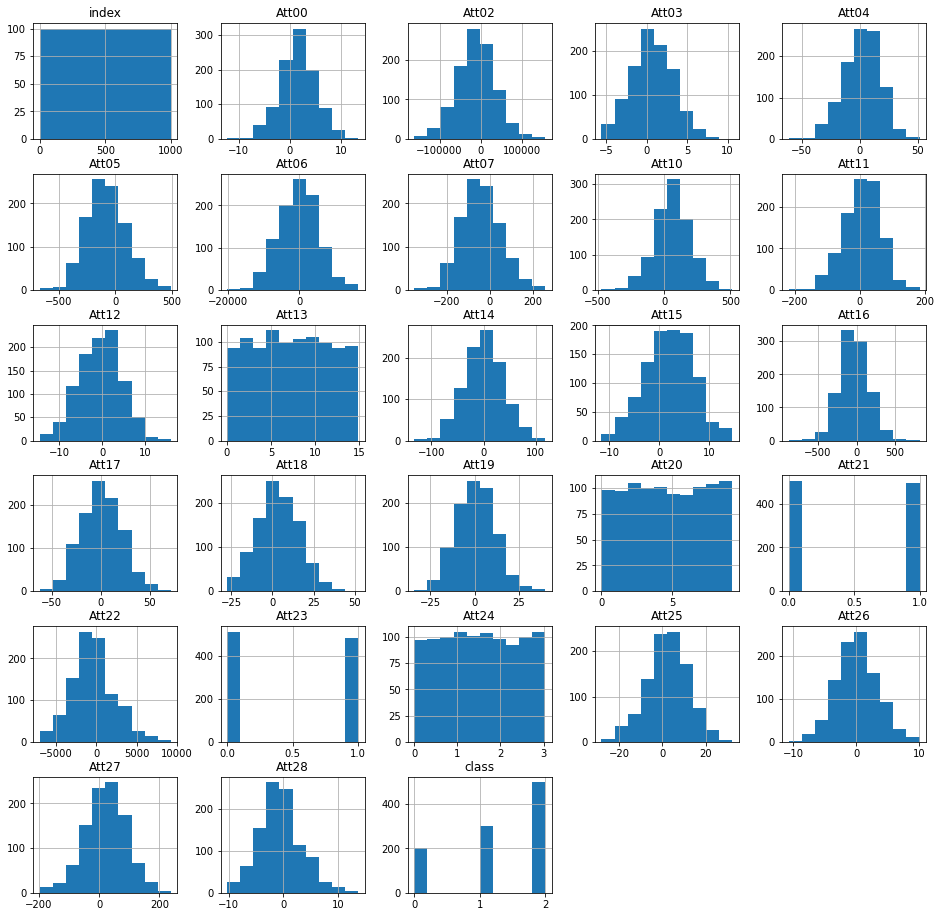

In [13]:
# Look at the distributions
df[:1000].hist(grid=True,figsize=(16, 16))

In [14]:
# Overview of the Data
from itertools import chain
import numpy as np
from math import sqrt, log

# Generator to create distinct items:
def uniq(iterable):
    seen = set()
    for x in iterable:
        if x in seen:
            continue
        seen.add(x)
        yield x

# NB: Consume all iterators to avoid problems

uniforms    = ['Att{}'.format(str(n).zfill(2)) for n in [ 13,20,24]]
categorical = ['Att01', 'Att08', 'Att29'] # Possibly multimodal
bimodal     = ['Att21', 'Att23']          # possibly also categorical 
target      = ['class']
irrelevant  = ['index']
sparse      = ['Att09']
gaussians   = list(filter(
    lambda x: x not in uniq(chain(bimodal, uniforms, target, categorical, sparse, irrelevant)), 
    ['Att{}'.format(str(n).zfill(2)) for n in range(0,30)]
))

In [15]:
df[:1000].tail()

,index,Att00,Att01,Att02,Att03,Att04,Att05,Att06,Att07,Att08,...,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,Att29,class
995,995,-0.943610,LLTF,41337,-2.505491,15.538770,22.069449,772,11.693093,YIFL,...,1,4052,1,1.015598,5.230581,-1.818562,50.530788,6.027271,TOYT,0.0
996,996,3.934235,LWYW,15327,-1.181318,2.343373,-136.183087,735,-72.154115,YIFL,...,1,-1705,1,2.157829,-0.127551,-0.624457,-34.533267,-2.537099,YLWZ,1.0
997,997,-0.168323,LLTF,45667,-5.302044,23.279239,-17.255493,3702,-9.142507,HFTX,...,1,-5260,1,2.084381,-3.834913,2.366121,42.542940,-7.824656,TOYT,0.0
998,998,8.670492,BYUB,-36502,0.117750,12.127904,-10.011875,-1836,-5.304609,YIFL,...,1,-5848,1,2.945487,14.065305,5.857224,86.608953,-8.698403,OQDJ,1.0
999,999,-6.398540,OSUG,-126075,-3.279768,1.174621,105.708143,7018,56.007524,YIFL,...,1,-503,1,0.205146,17.378122,6.420558,138.568525,-0.748940,OQDJ,2.0


In [16]:
# Some of the Object types
# Just for browsing some of the columns (Object types)

print("============= Categorical columns")

setA01 = set(df['Att01'])        # ->. {'ACKH', 'BYUB', 'GHKA', 'LLTF', 'LWYW', 'OSUG', 'SCIJ', 'UJJW', 'UKEV'}
setA08 = set(df['Att08'])        # ->  {'HFTX', 'YIFL'}
setA29 = set(df['Att29'])        # ->  {'FLJD', 'HUUV', 'OELG', 'OQDJ', 'PJIY', 'TOYT', 'YLWZ'}

pprint({
    'A01': setA01,
    'A08': setA08,
    'A29': setA29
})

# Binarization of these attributes before deciding what to do with them
# Convert them into Categorical types and replace them for feature engineering
wascategorical = ['Att01', 'Att08', 'Att29'] # Possibly multimodal

# For each object attribute, convert to a Categorical attribute
cats = list(map(lambda c: df[c].astype('category'), wascategorical))


df['Att01'] = cats[0] # For att01 
df['Att08'] = cats[1] # For att08
df['Att29'] = cats[2] # For att29 

df[['Att01','Att08','Att29']]

============= Categorical columns
{'A01': {'ACKH',
         'BYUB',
         'GHKA',
         'LLTF',
         'LWYW',
         'OSUG',
         'SCIJ',
         'TRRP',
         'UJJW',
         'UKEV'},
 'A08': {'VEVT', 'HFTX', 'YIFL'},
 'A29': {'OELG', 'FLJD', 'OQDJ', 'TOYT', 'PJIY', 'YLWZ', 'HUUV'}}


,Att01,Att08,Att29
0,GHKA,YIFL,YLWZ
1,BYUB,YIFL,OQDJ
2,UKEV,YIFL,YLWZ
3,LLTF,HFTX,YLWZ
4,LWYW,YIFL,OELG
...,...,...,...
1195,LWYW,HFTX,YLWZ
1196,BYUB,HFTX,TOYT
1197,LLTF,HFTX,OQDJ
1198,GHKA,YIFL,YLWZ


Define a function to encode columns using an encoder into values we can use in our classifier

In [17]:
from sklearn import preprocessing

# Assumption being the information is somehow conveyed in the ordering of the name 
# therefore AAAA < ZZZZ or Vice Versa

def encodecategories(adf, column, encoder):
    encoder.fit(adf[[column]])
    tle = encoder.transform(adf[[column]])
    adf[column] = tle
    return encoder

# Encode categorical entries

att01enc = encodecategories(df, 'Att01', preprocessing.OrdinalEncoder())
att08enc = encodecategories(df, 'Att08', preprocessing.OrdinalEncoder())
att29enc = encodecategories(df, 'Att29', preprocessing.OrdinalEncoder()) 

df[categorical]

,Att01,Att08,Att29
0,2.0,2.0,6.0
1,1.0,2.0,3.0
2,9.0,2.0,6.0
3,3.0,0.0,6.0
4,4.0,2.0,2.0
...,...,...,...
1195,4.0,0.0,6.0
1196,1.0,0.0,5.0
1197,3.0,0.0,3.0
1198,2.0,2.0,6.0


Bin our numerical features to reduce small observation errors. This can help the classifiers better grok the features

In [18]:
# Convert all categorical attributes to numerical 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
# https://stackoverflow.com/a/32011969

# Bin remaining columns and go categorical
# Settling at 10 Bins for each of the remaining categories


le,_ = df[:1000].shape
# TAX = 5
# NUMBINS = int(sqrt(le)) - TAX # https://stackoverflow.com/a/33458879
NUMBINS = int(1 + (3.322 * log(le))) # Sturges Rule


print("=================  Numbins = {}".format(NUMBINS))

def binfeatures(adf, feature, numbins, dup='drop'):
    return (feature, pd.cut(adf[feature], numbins, retbins=True, duplicates=dup))
    

def dobinning(adf, numbins, columns):
    # plt.figure(figsize=(16, 22)) 
    # plt.tight_layout()
    # plt.axis('off')

    for i,(feature,(res,bins)) in enumerate(map(lambda c: binfeatures(adf, c, numbins), columns)):
        adf[feature] = res.astype('category')
        print("Feature: ", feature)
        print("Bins.  : ", bins)
        # res.value_counts(sort=False).plot(kind='bar')
        # ax = plt.subplot(7,4,i+1)
        # ax.set_title(feature)
        # ax.set_axis_off()

    # Encode the Bins as numerical values, check the Distributions
    print("\n================== Encoding bins using OrdinalEncoder")
    cat_columns = adf.select_dtypes(['category']).columns
    print(cat_columns)

    # learn the categories, get encoders for each category
    encs = list(map(lambda col: encodecategories(adf, col, preprocessing.OrdinalEncoder()), cat_columns))

    # le = preprocessing.OrdinalEncoder()
    # le.fit(adf[cat_columns])
    # tle = le.transform(adf[cat_columns])
    # adf[cat_columns] = tle

    # df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

    # plt.show()
    
dobinning(df, NUMBINS, list(uniq(chain(gaussians,uniforms))))

=================  Numbins = 23
Feature:  Att00
Bins.  :  [-12.2977471  -11.1585087  -10.04488369  -8.93125867  -7.81763365
  -6.70400863  -5.59038362  -4.4767586   -3.36313358  -2.24950856
  -1.13588355  -0.02225853   1.09136649   2.20499151   3.31861652
   4.43224154   5.54586656   6.65949158   7.77311659   8.88674161
  10.00036663  11.11399165  12.22761666  13.34124168]
Feature:  Att02
Bins.  :  [-161652.856      -147337.26086957 -133343.52173913 -119349.7826087
 -105356.04347826  -91362.30434783  -77368.56521739  -63374.82608696
  -49381.08695652  -35387.34782609  -21393.60869565   -7399.86956522
    6593.86956522   20587.60869565   34581.34782609   48575.08695652
   62568.82608696   76562.56521739   90556.30434783  104550.04347826
  118543.7826087   132537.52173913  146531.26086957  160525.        ]
Feature:  Att03
Bins.  :  [-5.89855267 -5.16618794 -4.45028889 -3.73438984 -3.01849078 -2.30259173
 -1.58669268 -0.87079362 -0.15489457  0.56100448  1.27690354  1.99280259
  2.70870164

In [19]:
# Check the Data types of All our columns
df.dtypes

index      int64
Att00    float64
Att01    float64
Att02    float64
Att03    float64
Att04    float64
Att05    float64
Att06    float64
Att07    float64
Att08    float64
Att10    float64
Att11    float64
Att12    float64
Att13    float64
Att14    float64
Att15    float64
Att16    float64
Att17    float64
Att18    float64
Att19    float64
Att20    float64
Att21      int64
Att22    float64
Att23      int64
Att24    float64
Att25    float64
Att26    float64
Att27    float64
Att28    float64
Att29    float64
class    float64
dtype: object

Have a look at Multimodal and Bimodal distributions


In [20]:
sdists = ['Att01', 'Att08', 'Att23', 'Att21']

df[sdists].describe() # Maybe True false values ??

,Att01,Att08,Att23,Att21
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,4.039167,1.332500,0.515833,0.488333
std,2.320658,0.943054,0.499958,0.500072
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,1.000000,0.000000
75%,5.000000,2.000000,1.000000,1.000000
max,9.000000,2.000000,1.000000,1.000000


Use Z-score scaling for each of the columns which is sensitive to outliers which may be present

In [21]:
from sklearn.preprocessing import StandardScaler
# Z-Score Scaling as we aren't concerned about outliers.
toscale = ['Att{}'.format(str(n).zfill(2)) for n in range(0,30) if n != 9 ]
print(df.columns)
scaler = StandardScaler()
scaler.fit(df[toscale])
df[toscale] = scaler.transform(df[toscale])

Index(['index', 'Att00', 'Att01', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06',
       'Att07', 'Att08', 'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att15',
       'Att16', 'Att17', 'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23',
       'Att24', 'Att25', 'Att26', 'Att27', 'Att28', 'Att29', 'class'],
      dtype='object')


In [22]:
# Check duplication
df[df.duplicated() == True]

,index,Att00,Att01,Att02,Att03,Att04,Att05,Att06,Att07,Att08,...,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,Att29,class


Separate our labelled and unalabelled features

In [23]:
udf = df[1000:].copy(deep=True) # Unlabelled data
ldf =  df[:1000].copy(deep=True) # Labelled data

In [24]:
ldf.tail()

,index,Att00,Att01,Att02,Att03,Att04,Att05,Att06,Att07,Att08,...,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,Att29,class
995,995,-0.636807,-0.447976,1.137711,-1.281144,0.818614,0.528107,0.180904,0.528107,0.708102,...,1.023612,1.661457,0.968819,-0.602464,0.238585,-0.714102,0.531914,1.661065,0.545461,0.0
996,996,0.658943,-0.016884,0.546564,-0.724327,-0.105793,-0.343596,0.180904,-0.343596,0.708102,...,1.023612,-0.505366,0.968819,0.753080,-0.302628,-0.148290,-0.949740,-0.505542,1.102054,1.0
997,997,-0.636807,-0.447976,1.137711,-2.394779,1.434885,0.237539,0.810137,0.237539,-1.413551,...,1.023612,-1.859631,0.968819,0.602464,-0.573235,0.700428,0.235583,-1.859671,0.545461,0.0
998,998,1.954693,-1.310160,-0.635729,-0.167509,0.510478,0.528107,-0.448328,0.528107,0.708102,...,1.023612,-2.130484,0.968819,1.656776,1.321011,1.832052,0.828244,-2.130497,-0.567725,1.0
999,999,-2.256494,0.414207,-2.409169,-1.559553,-0.105793,1.109242,1.439369,1.109242,0.708102,...,1.023612,0.036339,0.968819,-1.506160,1.591617,1.832052,1.717237,0.036110,-0.567725,2.0


In [25]:
udf.head()

,index,Att00,Att01,Att02,Att03,Att04,Att05,Att06,Att07,Att08,...,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,Att29,class
1000,1000,0.011068,-0.447976,-0.635729,0.946125,-1.646472,-0.924732,0.810137,-0.924732,-1.413551,...,1.023612,-1.317925,0.968819,-1.054312,0.238585,-0.997008,1.420906,-1.318019,-1.124318,NaN
1001,1001,-0.960744,-0.016884,1.433284,-0.445918,0.510478,-1.505867,0.180904,-1.505867,0.708102,...,1.023612,0.848898,0.968819,-0.451848,-0.032022,-1.562819,-0.949740,0.848588,1.102054,NaN
1002,1002,-0.636807,-0.016884,0.546564,0.946125,0.510478,-0.634164,0.495521,-0.634164,0.708102,...,-0.976933,-1.047072,-1.032184,0.451848,-1.114448,0.417522,-0.060748,-1.047193,0.545461,NaN
1003,1003,1.306818,-1.310160,-0.044582,0.667717,-0.722065,-0.343596,-0.762944,-0.343596,-1.413551,...,-0.976933,-0.776219,0.968819,1.054312,-0.032022,-0.714102,0.235583,-0.776367,1.102054,NaN
1004,1004,0.011068,0.414207,-0.044582,-2.116370,-0.413929,1.690377,1.439369,1.690377,0.708102,...,-0.976933,-1.047072,-1.032184,0.451848,0.509191,0.700428,-0.949740,-1.047193,0.545461,NaN


For each of the above issues your report should:

    * Describe the relevant issue in your own words and explain why it is important to address it. Your explanation must consider the classification task that you will undertake subsequently.
    * Demonstrate clearly that such an issue exists in the data with suitable illustration/evidence.
    * Clearly state and explain your choice of action to address such an issue.
    * Demonstrate convincingly that your action has addressed the issue satisfactorily. Where applicable, you should provide references to support your arguments

View correlation between attributes using df.corr

In [26]:
import seaborn as sns

<AxesSubplot:>

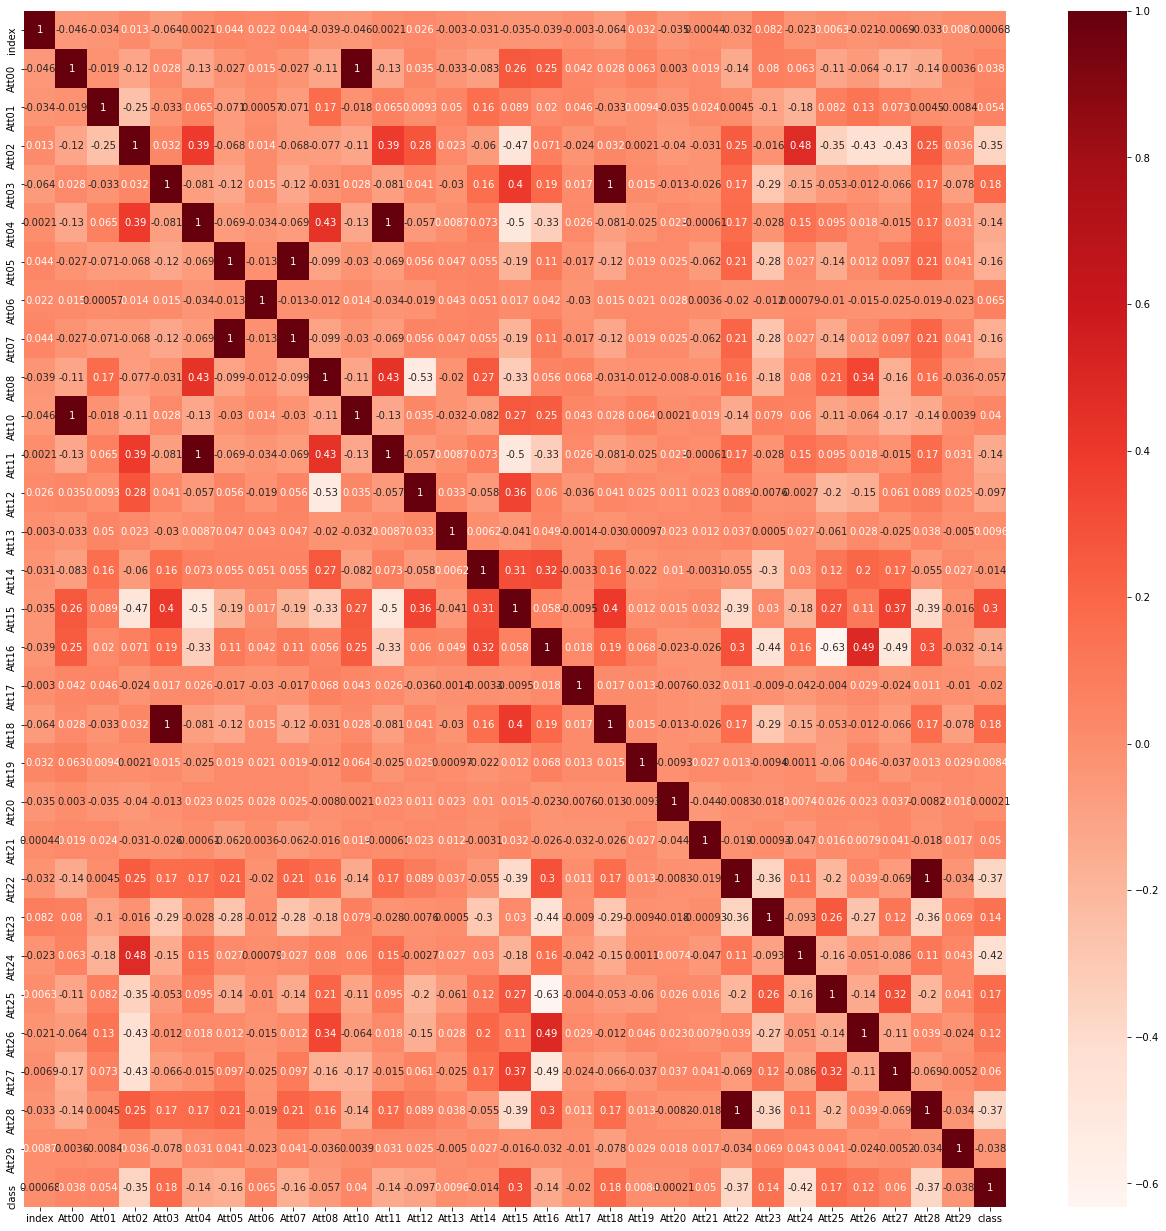

In [27]:
# use seaborn to do the plot
fig, ax = plt.subplots(figsize=(22,22))         # Sample figsize in inches

corrs = df.corr()

# Correlation for preprocessing
sns.heatmap(corrs, annot=True, cmap=plt.cm.Reds, ax=ax)

In [28]:
# Drop the sparse dataset and any other attributes we may not need,
# Return main features and target for feature selection

def preparefeatureselection(adf, todrop, errors='ignore'):
    pX = adf[ list(filter(lambda h: h not in todrop , ['Att{}'.format(str(n).zfill(2)) for n in range(0,30)] )) ]
    print("================= Columns used for feature selection ")
    print(pX.columns)
    print("================= Shape of remaining data ")
    print(pX.shape)
    py = adf['class']
    return pX, py

oX, y = preparefeatureselection(ldf, sparse)

================= Columns used for feature selection 
Index(['Att00', 'Att01', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07',
       'Att08', 'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att15', 'Att16',
       'Att17', 'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att24',
       'Att25', 'Att26', 'Att27', 'Att28', 'Att29'],
      dtype='object')
================= Shape of remaining data 
(1000, 29)


###  Feature Selection

Get the best independent features for our target attribute 

In [29]:
# https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection
from sklearn.feature_selection import  SelectPercentile, f_classif

print("Columns: ", oX.columns)
print("====== Incoming shape:  ", oX.shape)

# Cherry pick the 60th percentile by correlation based on f_classif (Numerical -> Categorical classification)
pselector = SelectPercentile(f_classif, percentile=60)
pselector.fit(oX, y)
print("====== Column selected")

# Mask against selected columns to a new DataFrame
corrstrong = list(map(lambda a : a[1] , filter(lambda z : z[0], zip(pselector.get_support(), oX.columns))))

print(corrstrong)


X_P = pselector.transform(oX) 
print("======= Outgoing shape: ", X_P.shape)


X_new = pd.DataFrame(X_P, columns=corrstrong)

X_new.head()

Columns:  Index(['Att00', 'Att01', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07',
       'Att08', 'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att15', 'Att16',
       'Att17', 'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att24',
       'Att25', 'Att26', 'Att27', 'Att28', 'Att29'],
      dtype='object')
====== Incoming shape:   (1000, 29)
====== Column selected
['Att02', 'Att03', 'Att04', 'Att05', 'Att07', 'Att08', 'Att11', 'Att12', 'Att15', 'Att16', 'Att18', 'Att22', 'Att24', 'Att25', 'Att26', 'Att27', 'Att28']
======= Outgoing shape:  (1000, 17)


,Att02,Att03,Att04,Att05,Att07,Att08,Att11,Att12,Att15,Att16,Att18,Att22,Att24,Att25,Att26,Att27,Att28
0,-0.635729,2.338169,-0.105793,-1.505867,-1.505867,0.708102,-0.105793,1.599801,2.055663,2.642469,2.338169,0.848898,-1.204928,-0.573235,2.397863,-1.838732,0.848588
1,-0.931302,-0.724327,-1.030200,0.528107,0.528107,0.708102,-1.030200,-2.483061,-0.676940,0.002828,-0.724327,-0.505366,0.000000,0.509191,-0.431196,-0.357079,-0.505542
2,-0.931302,-0.445918,-0.105793,1.690377,1.690377,0.708102,-0.105793,-1.394297,-0.925359,0.757011,-0.445918,0.036339,-0.150616,-1.114448,0.417522,0.235583,0.036110
3,1.137711,-1.002735,0.202342,-0.053029,-0.053029,-1.413551,0.202342,1.327611,-0.180103,1.134103,-1.002735,1.661457,1.204928,-1.385054,0.134616,0.828244,1.661065
4,-1.226876,0.946125,-0.413929,1.109242,1.109242,0.708102,-0.413929,-1.394297,-0.180103,-0.751355,0.946125,1.119751,-0.602464,0.238585,-0.997008,2.013568,1.119414


In [30]:
# Check final dataframe features
X_new.describe()

,Att02,Att03,Att04,Att05,Att07,Att08,Att11,Att12,Att15,Att16,Att18,Att22,Att24,Att25,Att26,Att27,Att28
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.004778,0.029326,0.006060,-0.008572,-0.008572,0.014321,0.006060,-0.015379,-0.001242,0.012255,0.029326,0.006816,0.002711,-0.004149,0.008723,-0.011557,0.006861
std,0.988395,1.002043,0.998271,1.003932,1.003932,0.995802,0.998271,0.992468,0.996641,1.003479,1.002043,1.008540,1.000387,1.004098,1.007624,1.003241,1.008557
min,-3.000316,-2.394779,-3.495286,-3.249273,-3.249273,-1.413551,-3.495286,-2.755251,-2.664288,-3.390996,-2.394779,-2.401337,-1.656776,-3.008694,-3.260255,-3.024055,-2.401323
25%,-0.635729,-0.724327,-0.722065,-0.634164,-0.634164,-1.413551,-0.722065,-0.849916,-0.676940,-0.751355,-0.724327,-0.776219,-0.903696,-0.573235,-0.714102,-0.653409,-0.776367
50%,-0.044582,0.110899,-0.105793,-0.053029,-0.053029,0.708102,-0.105793,-0.033343,0.068315,0.002828,0.110899,0.036339,0.000000,-0.032022,0.134616,-0.060748,0.036110
75%,0.546564,0.667717,0.818614,0.528107,0.528107,0.708102,0.818614,0.783229,0.565152,0.757011,0.667717,0.578045,0.903696,0.779798,0.700428,0.828244,0.577762
max,3.206724,3.451803,2.975564,3.143215,3.143215,0.708102,2.975564,2.960755,2.552500,3.773744,3.451803,3.557427,1.656776,2.944650,2.963675,2.902560,3.556846


Check the ratio of imbalance in our target categeory


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
from collections import Counter

# See the number of count in each class -> Noticed the class imbalance ratio is like: 2:3:5
print(Counter(y))

Counter({2.0: 498, 1.0: 301, 0.0: 201})


<AxesSubplot:>

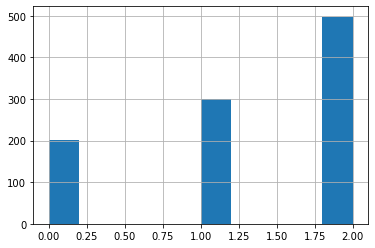

In [32]:
y.hist()

Given the features in our dataset, lets find the minimum number of features that can be used to represent it, reducing the dimensionality. Let us first just check this relationship. 

This plot is just to give us an idea first for the whole dataset the test and prediction data will only be transformed and the training set will be fitted and transformed.

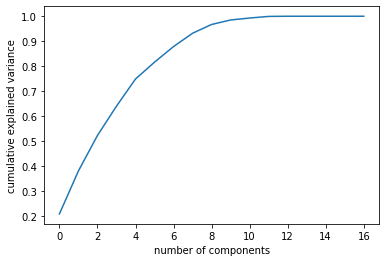

In [33]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
pca = PCA().fit(X_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [34]:
# DO PCA on the training and testing data
# https://stats.stackexchange.com/questions/55718/pca-and-the-train-test-split
# https://stats.stackexchange.com/a/125328
# https://stats.stackexchange.com/questions/125172/pca-on-train-and-test-datasets-should-i-run-one-pca-on-traintest-or-two-separa
# Therefore fit the PCA on the training data and transform the testing data

def fitpca(X, comp=13):
    pca = PCA(n_components=comp)
    Xout = pca.fit_transform(X)
    return Xout,pca


def transformpca(X, pca):
    X_PCA = pca.transform(X)
    print("original shape:   ", X.shape)
    print("transformed shape:", X_PCA.shape)
    return X_PCA

#### Split our Training and Testing data and Dimensionality reduction

In [35]:
# Remember we have a class imbalance, use stratify on train test split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

X_train, X_test, y_train, y_test = train_test_split(X_new, y,
                                                    test_size=0.33,
                                                    random_state=2,
                                                    stratify=y   # For the class imbalance
                                                   )
# Fit PCA on our training
X_train, pca = fitpca(X_train, comp=13)

# Only transfor the test
X_test = transformpca(X_test, pca)

original shape:    (330, 17)
transformed shape: (330, 13)


# Data Classification

For this task, you will demonstrate convincingly how you select, train, and fine tune your predictive
models to predict the missing labels. You must use at least the three (3) classifiers that have been
discussed in the workshops, namely k-NN, Naive Bayes, and Decision Trees. You can also select
additional classifiers (both base classifiers and meta-classifiers). 
Attempt and report the following:

• Class imbalance: the original labelled data is not equally distributed between the three classes.
You need to demonstrate that such an issue exists within the data, explain the importance of
this issue, and describe how you address this problem.

• Model training and tuning: Every classifier typically has hyperparameters to tune in order. For
each classifier, you need to select (at least one) and explain the tuning hyperparameters of your
choice. You must select and describe a suitable cross-validation/validation scheme that can
measure the performance of your model on labelled data well and can address the class
imbalance issue. Then you will need to conduct the actual tuning of your model and report the
tuning results in detail. You are expected to look at several classification performance metrics
and make comments on the classification performance of each model. Finally, you will need to
clearly indicate and justify the selected values of the tuning hyperparameters of each model.

## KNN Classification


==================== Check the Split ratios
Counter({2.0: 333, 1.0: 202, 0.0: 135})
Counter({2.0: 165, 1.0: 99, 0.0: 66})

==================== Fitting KNN
==================== Crossvalidation results
{'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'} 0.7830173747820807
==================== Confusion Matrix
==================== Trial prediction
==================== Classification report
              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72        66
         1.0       0.89      0.71      0.79        99
         2.0       0.84      0.97      0.90       165

    accuracy                           0.84       330
   macro avg       0.83      0.79      0.80       330
weighted avg       0.84      0.84      0.83       330

Accuracy Score = 0.8363636363636363


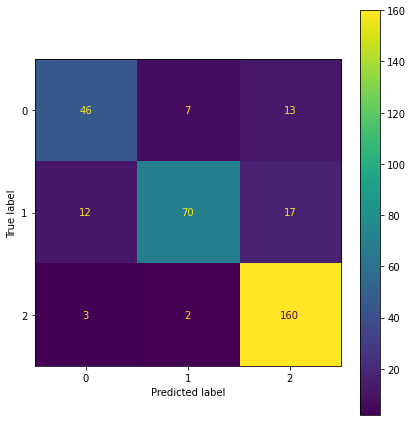

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit 
from sklearn.preprocessing import OrdinalEncoder

print()
print("==================== Check the Split ratios")
print(Counter(y_train))
print(Counter(y_test))
print()

parameters = {'weights': ('uniform', 'distance'),
              'p': [1,2],
              'metric': ['euclidean', 'manhattan','minkowski'],
              'n_neighbors':[1 , 3, 5, 7, 11, 17, 21]}

# https://stackoverflow.com/questions/34731421/whats-the-difference-between-kfold-and-shufflesplit-cv
# https://xzz201920.medium.com/stratifiedkfold-v-s-kfold-v-s-stratifiedshufflesplit-ffcae5bfdf
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=2)

# sss = StratifiedShuffleSplit(n_splits=10, test_size=0.33, random_state=2)


print("==================== Fitting KNN")
knn = KNeighborsClassifier()


k_gscv = GridSearchCV(estimator=knn,
                    param_grid=parameters,
                    cv= skf, # Cross validation
                    scoring='balanced_accuracy')

results = k_gscv.fit(X_train, y_train)

print("==================== Crossvalidation results")
print(results.best_params_, results.best_score_)

fig, ax = plt.subplots(1,1, figsize=(6, 6))

print("==================== Confusion Matrix")
metrics.plot_confusion_matrix(k_gscv,
                              X_test, y_test,
                              display_labels=['0', '1', '2'],
                              ax=ax)

print("==================== Trial prediction")
y_pred = k_gscv.predict(X_test)

print("==================== Classification report")
print(metrics.classification_report(y_test, y_pred))

print("Accuracy Score = ", sep='', end='')
print(metrics.accuracy_score(y_test, y_pred))

plt.tight_layout()
plt.show()

## Decision tree classifier

==================== Fitting Decision tree
==================== Crossvalidation results
{'class_weight': {0.0: 2, 1.0: 3, 2.0: 5}, 'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'} 0.653016362722245
==================== Confusion matrix
==================== Classification report
              precision    recall  f1-score   support

         0.0       0.69      0.44      0.54        66
         1.0       0.73      0.63      0.67        99
         2.0       0.73      0.90      0.80       165

    accuracy                           0.72       330
   macro avg       0.72      0.65      0.67       330
weighted avg       0.72      0.72      0.71       330

Accuracy = 0.7242424242424242


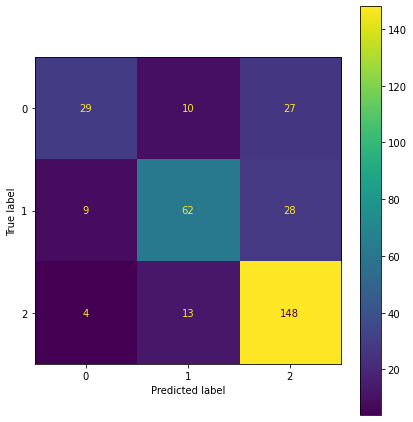

In [37]:
## Use a descision tree classifier
## Using a descision tree classifier:
## - Train the classifier using both the `Gini index` and `entropy` criterion for splitting.
## - Choose the classifier which has the highest F1 score as your best classifier.

from sklearn import tree


parameters = {'criterion': ('gini', 'entropy'),
              'min_samples_split':[3, 5, 15, 20, 25 ],
              'min_samples_leaf': [n for n in range(2,11)],
              'max_depth': [n for n in range(3,9)],
              'class_weight': [{0.0:2, 1.0:3, 2.0:5}],
              'splitter': ('best','random'),
             }

print("==================== Fitting Decision tree")
                                # Counter({2.0: 373, 1.0: 226, 0.0: 151})
dtc = tree.DecisionTreeClassifier(random_state=2)
d_gscv = GridSearchCV(estimator=dtc,
                    param_grid=parameters,
                    cv=skf,
                    scoring='balanced_accuracy')

results = d_gscv.fit(X_train, y_train)

print("==================== Crossvalidation results")
print(results.best_params_, results.best_score_)

# fig, ax = plt.subplots(1,1, figsize=(12,12))
# tree.plot_tree(
#               gscv.best_estimator_, 
#               filled=True, # color the nodes based on class/purity
#               ax=ax, fontsize=12)
# plt.show()

fig, ax = plt.subplots(1,1, figsize=(6, 6))

print("==================== Confusion matrix")
metrics.plot_confusion_matrix(d_gscv,
                              X_test, y_test,
                              display_labels=['0', '1', '2'],
                              ax=ax)

y_pred = d_gscv.predict(X_test)

print("==================== Classification report")
print(metrics.classification_report(y_test, y_pred))

print("Accuracy = ", sep='', end='')
print(metrics.accuracy_score(y_test, y_pred))

plt.tight_layout()
plt.show()

## Naive Bayes Classifier

(670, 13)
              precision    recall  f1-score   support

         0.0       0.64      0.48      0.55        66
         1.0       0.71      0.66      0.68        99
         2.0       0.79      0.90      0.84       165

    accuracy                           0.75       330
   macro avg       0.71      0.68      0.69       330
weighted avg       0.74      0.75      0.74       330

Accuracy = 0.7454545454545455


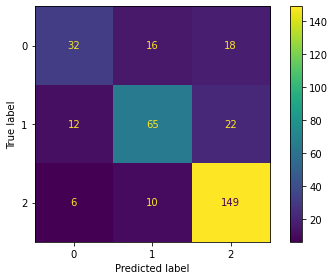

In [38]:
from sklearn import naive_bayes


print(X_train.shape)

# no real parameters to adjust here
fig, ax = plt.subplots(1,1)
nb = naive_bayes.GaussianNB()
classifier = nb.fit(X_train, y_train)

metrics.plot_confusion_matrix(classifier,
                              X_test, y_test,
                              display_labels=['0', '1', '2'],
                              ax=ax)

y_pred = nb.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

print("Accuracy = ", sep='', end='')
print(metrics.accuracy_score(y_test, y_pred))

plt.tight_layout()
plt.show()

# Prediction

Use the best two (2) models that you have identified in the previous step to predict the
missing class labels of the last 200 samples in the original data set. Clearly explain in
detail how you arrive at the prediction.
o Provide your prediction in the report by creating a table, the first column is the sample
ID, the second and third columns are the predicted class labels respectively. Observe
and comment on the prediction that you have produced.
o Produce an sqlite3 database file with the name Answers.sqlite that contains your
prediction in the format: the first column is the sample ID, the second and third columns
are the predicted class labels. All columns should be integers. This file must be
submitted electronically with the electronic copy of the report via Blackboard. An
example of such a file is given below:

- Using accuracy and F1 score : KNN and Naive bayes

In [39]:
# View the unlabelled entries for sparse data
# Only the predicted elements seem to be missing which is OK
udf.describe()

,index,Att00,Att01,Att02,Att03,Att04,Att05,Att06,Att07,Att08,...,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,Att29,class
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,0.0
mean,1099.500000,-0.003509,-0.077237,-0.023892,-0.146629,-0.030300,0.042859,-0.006292,0.042859,-0.071606,...,-0.076688,-0.034082,0.308488,-0.013555,0.020747,-0.043615,0.057784,-0.034305,0.136365,NaN
std,57.879185,0.998995,1.015415,1.060754,0.981624,1.013060,0.984010,0.938351,0.984010,1.022706,...,0.997756,0.960489,0.943258,1.002967,0.984022,0.964840,0.986627,0.960393,0.952640,NaN
min,1000.000000,-2.256494,-1.310160,-3.000316,-2.394779,-3.495286,-2.377570,-2.650642,-2.377570,-1.413551,...,-0.976933,-2.130484,-1.032184,-1.656776,-2.467481,-2.977349,-2.135063,-2.130497,-2.237504,NaN
25%,1049.750000,-0.717791,-0.879068,-0.635729,-0.724327,-0.722065,-0.634164,-0.526982,-0.634164,-1.413551,...,-0.976933,-0.776219,-1.032184,-0.903696,-0.573235,-0.714102,-0.653409,-0.776367,-0.567725,NaN
50%,1099.500000,0.011068,-0.016884,-0.044582,-0.167509,0.048275,-0.053029,-0.133712,-0.053029,0.708102,...,-0.976933,0.036339,0.968819,0.000000,-0.032022,-0.148290,0.235583,0.036110,0.545461,NaN
75%,1149.250000,0.658943,0.414207,0.546564,0.389308,0.510478,0.528107,0.495521,0.528107,0.708102,...,1.023612,0.578045,0.968819,0.903696,0.779798,0.700428,0.605996,0.577762,1.102054,NaN
max,1199.000000,2.278630,2.138575,3.206724,2.616577,2.359293,3.143215,3.327066,3.143215,0.708102,...,1.023612,3.015721,0.968819,1.656776,2.403437,2.397863,3.198891,3.015195,1.102054,NaN


In [40]:
udf.head()

,index,Att00,Att01,Att02,Att03,Att04,Att05,Att06,Att07,Att08,...,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,Att29,class
1000,1000,0.011068,-0.447976,-0.635729,0.946125,-1.646472,-0.924732,0.810137,-0.924732,-1.413551,...,1.023612,-1.317925,0.968819,-1.054312,0.238585,-0.997008,1.420906,-1.318019,-1.124318,NaN
1001,1001,-0.960744,-0.016884,1.433284,-0.445918,0.510478,-1.505867,0.180904,-1.505867,0.708102,...,1.023612,0.848898,0.968819,-0.451848,-0.032022,-1.562819,-0.949740,0.848588,1.102054,NaN
1002,1002,-0.636807,-0.016884,0.546564,0.946125,0.510478,-0.634164,0.495521,-0.634164,0.708102,...,-0.976933,-1.047072,-1.032184,0.451848,-1.114448,0.417522,-0.060748,-1.047193,0.545461,NaN
1003,1003,1.306818,-1.310160,-0.044582,0.667717,-0.722065,-0.343596,-0.762944,-0.343596,-1.413551,...,-0.976933,-0.776219,0.968819,1.054312,-0.032022,-0.714102,0.235583,-0.776367,1.102054,NaN
1004,1004,0.011068,0.414207,-0.044582,-2.116370,-0.413929,1.690377,1.439369,1.690377,0.708102,...,-0.976933,-1.047072,-1.032184,0.451848,0.509191,0.700428,-0.949740,-1.047193,0.545461,NaN


In [41]:
udf[udf.duplicated() == True]

,index,Att00,Att01,Att02,Att03,Att04,Att05,Att06,Att07,Att08,...,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,Att29,class


In [42]:
uX, uy = preparefeatureselection(udf, sparse)

================= Columns used for feature selection 
Index(['Att00', 'Att01', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07',
       'Att08', 'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att15', 'Att16',
       'Att17', 'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att24',
       'Att25', 'Att26', 'Att27', 'Att28', 'Att29'],
      dtype='object')
================= Shape of remaining data 
(200, 29)


In [43]:
# Select the features used on our models ( in the 60th percentile )
# uX[corrstrong]
fX = pd.DataFrame(pselector.transform(uX), columns=corrstrong)
fX

,Att02,Att03,Att04,Att05,Att07,Att08,Att11,Att12,Att15,Att16,Att18,Att22,Att24,Att25,Att26,Att27,Att28
0,-0.635729,0.946125,-1.646472,-0.924732,-0.924732,-1.413551,-1.646472,0.783229,1.807244,-1.128447,0.946125,-1.317925,-1.054312,0.238585,-0.997008,1.420906,-1.318019
1,1.433284,-0.445918,0.510478,-1.505867,-1.505867,0.708102,0.510478,0.238847,-1.422196,-0.751355,-0.445918,0.848898,-0.451848,-0.032022,-1.562819,-0.949740,0.848588
2,0.546564,0.946125,0.510478,-0.634164,-0.634164,0.708102,0.510478,0.511038,0.565152,0.379920,0.946125,-1.047072,0.451848,-1.114448,0.417522,-0.060748,-1.047193
3,-0.044582,0.667717,-0.722065,-0.343596,-0.343596,-1.413551,-0.722065,-0.305534,0.813570,-0.374263,0.667717,-0.776219,1.054312,-0.032022,-0.714102,0.235583,-0.776367
4,-0.044582,-2.116370,-0.413929,1.690377,1.690377,0.708102,-0.413929,1.055420,0.316734,0.757011,-2.116370,-1.047072,0.451848,0.509191,0.700428,-0.949740,-1.047193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.842138,-1.559553,-1.646472,-0.053029,-0.053029,-1.413551,-1.646472,0.511038,-0.428522,1.134103,-1.559553,0.036339,1.656776,-1.655661,-0.997008,-1.246071,0.036110
196,-0.340156,1.781351,-1.338336,0.528107,0.528107,-1.413551,-1.338336,-0.849916,1.061989,-0.374263,1.781351,-0.505366,-1.506160,1.591617,-1.279913,-0.357079,-0.505542
197,-0.931302,0.946125,-1.646472,-0.053029,-0.053029,-1.413551,-1.646472,1.055420,1.807244,0.757011,0.946125,-1.047072,-1.506160,-1.655661,0.417522,0.531914,-1.047193
198,-2.704742,0.667717,-2.570879,1.690377,1.690377,0.708102,-2.570879,-0.305534,1.310407,3.019561,0.667717,1.661457,-1.656776,-1.114448,2.397863,0.235583,1.661065


In [44]:
# Apply PCA on our prediction data
preddata = transformpca(fX, pca)

original shape:    (200, 17)
transformed shape: (200, 13)


## KNN Classifier prediction

In [45]:
# KNN prediction based on features
ky = k_gscv.predict(preddata)

In [46]:
# Check the Distribution of the prediction
Counter(ky)

Counter({2.0: 113, 1.0: 50, 0.0: 37})

In [47]:
ky

array([2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 0.,
       2., 2., 1., 2., 2., 0., 2., 1., 2., 2., 2., 2., 2., 2., 2., 0., 0.,
       2., 2., 1., 1., 0., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 0., 1.,
       1., 2., 1., 2., 1., 1., 0., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2.,
       2., 0., 1., 2., 0., 2., 2., 1., 0., 2., 1., 2., 1., 2., 0., 2., 2.,
       2., 2., 1., 2., 2., 1., 0., 0., 2., 0., 0., 1., 2., 0., 0., 2., 0.,
       0., 0., 0., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 0., 1., 2.,
       1., 1., 1., 2., 2., 0., 0., 1., 2., 2., 1., 0., 2., 1., 2., 2., 1.,
       1., 2., 2., 2., 1., 1., 2., 0., 2., 2., 1., 1., 2., 2., 2., 2., 2.,
       0., 0., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1.,
       1., 0., 2., 2., 2., 2., 0., 2., 2., 0., 0., 2., 1., 1., 2., 2., 2.,
       2., 0., 0., 0., 1., 2., 2., 2., 0., 2., 2., 2., 1.])

## Naive Bayes prediction

In [48]:
# Naive bayes prediction based on features
ny = nb.predict(preddata)

In [49]:
# Check the Distribution of the prediction
Counter(ny)

Counter({2.0: 110, 0.0: 39, 1.0: 51})

In [50]:
pprint(ny)

array([2., 0., 2., 2., 0., 2., 0., 2., 2., 2., 2., 1., 2., 2., 2., 1., 0.,
       2., 1., 0., 1., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0.,
       2., 2., 1., 1., 0., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 1.,
       1., 2., 1., 1., 0., 0., 2., 2., 2., 0., 2., 2., 1., 0., 2., 2., 2.,
       2., 2., 1., 2., 0., 2., 2., 1., 0., 2., 1., 0., 1., 2., 1., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 0., 1., 0., 0., 1., 2., 1., 0., 2., 0.,
       1., 0., 0., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 0., 1., 2.,
       1., 1., 1., 2., 2., 0., 0., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1.,
       1., 2., 2., 1., 2., 1., 2., 0., 2., 2., 1., 1., 2., 2., 0., 1., 2.,
       0., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1.,
       2., 0., 2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 1., 1., 2., 2., 1.,
       2., 0., 2., 0., 0., 2., 2., 2., 0., 2., 2., 2., 1.])


our prediction distribution relatively reflects the input data in terms of distribution. It is likely that the imbalance leaked through

In [51]:
# Prepare our dataframe for exporting
finaldf = pd.DataFrame([
    range(1000,1200), ky, ny
]).transpose()

finaldf.columns = ['index', 'Predict1', 'Predict2']

finaldf['index'] = finaldf['index'].astype(int)
finaldf['Predict1'] = finaldf['Predict1'].astype(int)
finaldf['Predict2'] = finaldf['Predict2'].astype(int)

finaldf.dtypes

index       int64
Predict1    int64
Predict2    int64
dtype: object

In [52]:
finaldf

,index,Predict1,Predict2
0,1000,2,2
1,1001,1,0
2,1002,2,2
3,1003,2,2
4,1004,1,0
...,...,...,...
195,1195,0,0
196,1196,2,2
197,1197,2,2
198,1198,2,2


In [53]:
# Export the data
ccon = sqlite3.connect("Answers.sqlite")

finaldf.to_sql("data", ccon,  if_exists='replace', index=False) # dtype={"Predict1": Integer(), "Predict2": Integer() })